In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train_cat, epochs=10,
          validation_data=(x_test, y_test_cat),
          batch_size=64)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 63s 64ms/step - accuracy: 0.8400 - loss: 0.5080 - val_accuracy: 0.9805 - val_loss: 0.0596
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 57ms/step - accuracy: 0.9741 - loss: 0.0911 - val_accuracy: 0.9889 - val_loss: 0.0346
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 54ms/step - accuracy: 0.9807 - loss: 0.0622 - val_accuracy: 0.9894 - val_loss: 0.0320
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.9853 - loss: 0.0494 - val_accuracy: 0.9894 - val_loss: 0.0298
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 58ms/step - accuracy: 0.9871 - loss: 0.0443 - val_accuracy: 0.9923 - val_loss: 0.0256
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.9890 - loss: 0.0364 - val_accuracy: 0.9908 - val_loss: 0.0258
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 79s 56ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9916 - val_loss: 0.0276
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9904 - loss: 0.0287 - 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9905 - loss: 0.0315

Test Accuracy: 99.29%


In [ ]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


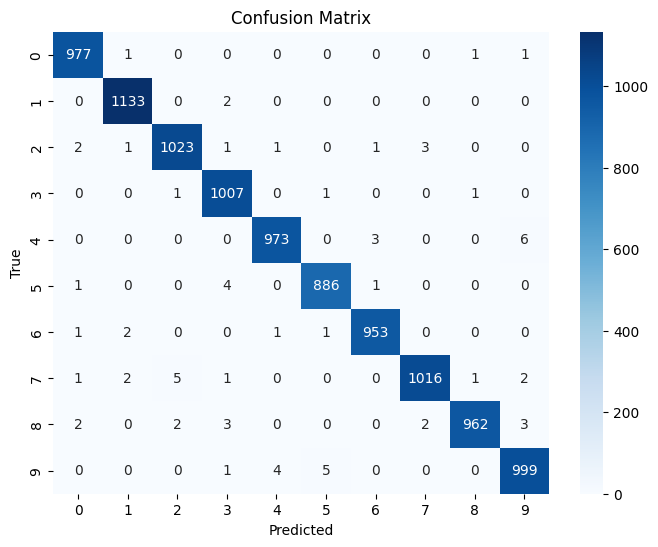

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
